# Lab04A_Câu 3

In [1]:
# import basic libraries 
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import plot libraries 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
# Read data
data = pd.read_csv("BigMartSales.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


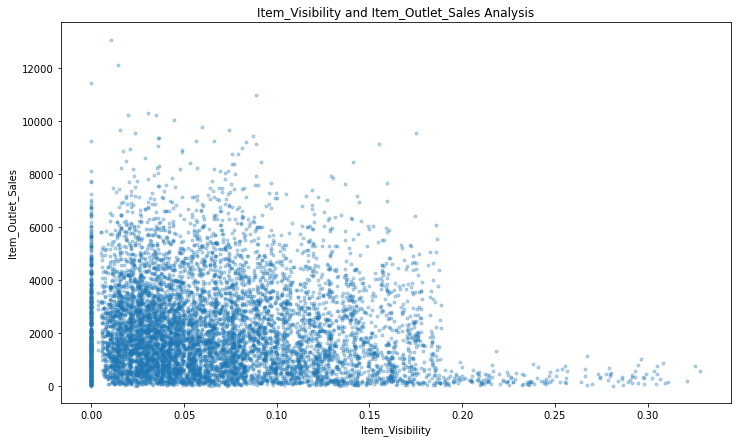

In [6]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(data.Item_Visibility, data["Item_Outlet_Sales"],'.', alpha = 0.3)

## Access:
- Các mặt hàng của công ty được bày bán chiếm chủ yếu ở mức 5% cho đến 15%.
- Các mặt hàng của công ty được bày bán chiếm nhiều nhất chỉ đến 30% các mặt hàng trong các cửa hàng.

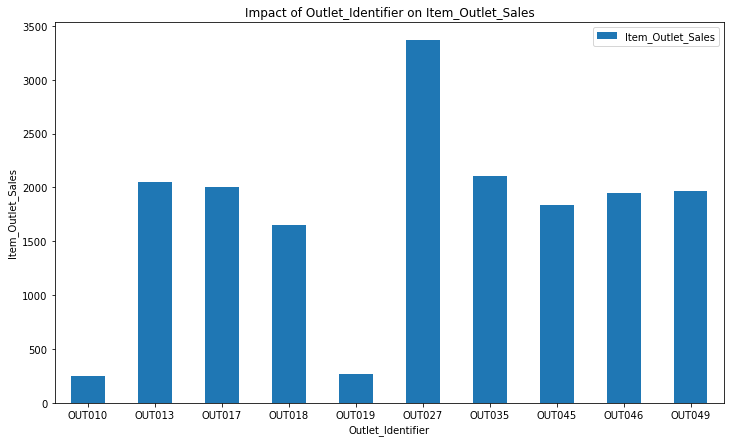

In [7]:
Outlet_Identifier_pivot = \
data.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', figsize=(12,7))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

## Access:
- Biểu đồ cho thấy các mặt hàng được bán chạy nhất là các mặt hàng OUT027.
- Biểu đồ cho thấy các mặt hàng được bán ít nhất là các mặt hàng OUT010.

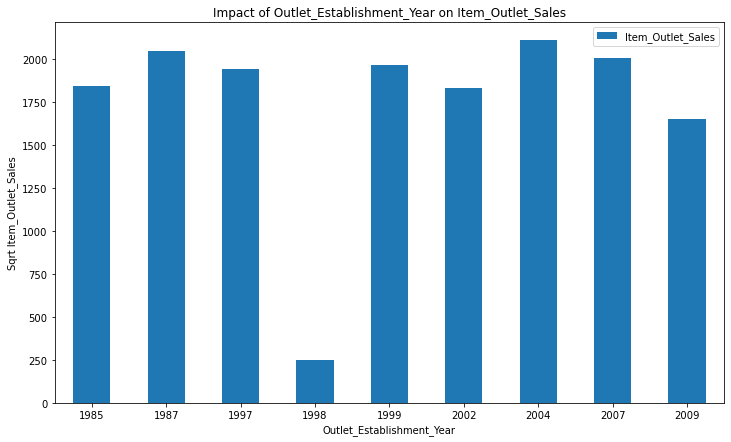

In [8]:
Outlet_Establishment_Year_pivot = \
data.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

## Access:
- Biểu đồ cho thấy doanh số bán hàng của công ty qua các năm.
- Doanh số bán hàng trung bình đạt cao nhất ở năm 2004 và đạt thấp nhất ở năm 1998.
- Doanh số bán hàng phát triển khá ổn định trong những năm 1985 đến 1997, tuy nhiên, lại sụt giảm trầm trọng vào năm 1998, và phát triển mạnh mẽ từ sau năm 1998.

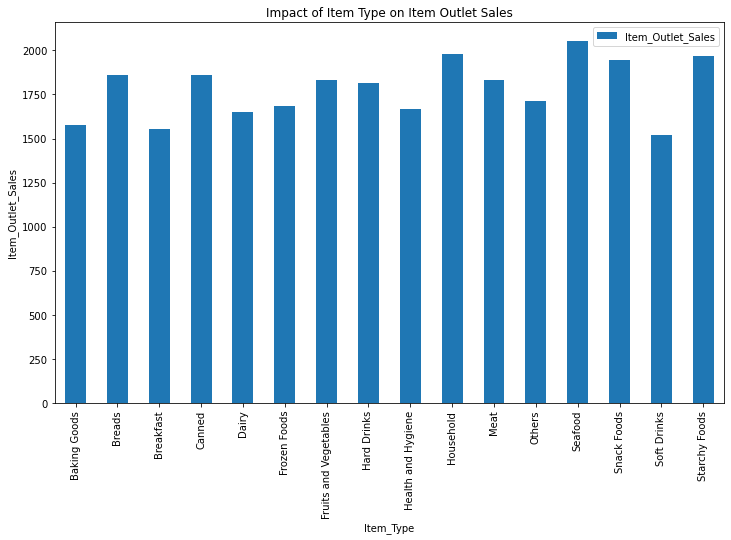

In [9]:
IT_pivot = \
data.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.median)
IT_pivot.plot(kind='bar', figsize=(12,7))
plt.xlabel("Item_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item Type on Item Outlet Sales")
plt.xticks(rotation=90)
plt.show()

## Access:
- Biểu đồ cho thấy các mặt hàng được nhập để bán gồm đầy đủ các loại thực phẩm.
- Mặt hàng bán được nhiều nhất là 'Seafood' với hơn 2000.
- Mặt hàng bán được ít nhất là 'Soft Drinks' với hơn 1250.


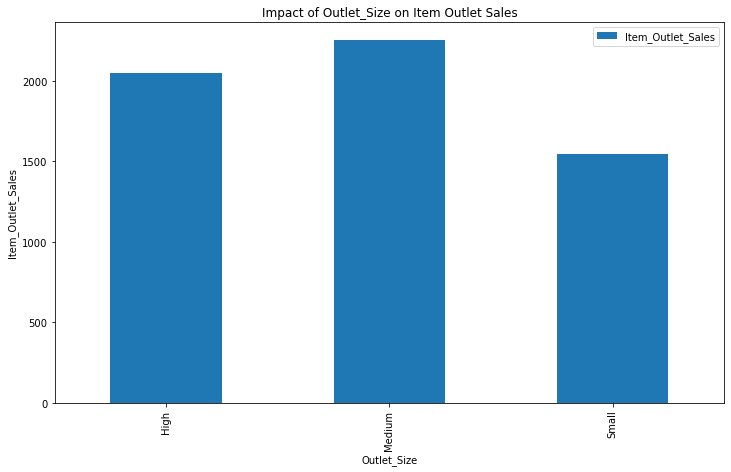

In [10]:
OS_pivot = \
data.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)
OS_pivot.plot(kind='bar', figsize=(12,7))
plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item Outlet Sales")
plt.xticks(rotation=90)
plt.show()

## Access:
- Biểu đồ thể hiện các mặt hàng được bày bán trong các dạng cửa hàng khác nhau từ cao cho đến thấp.
- Các mặt hàng được bày bán đa phần ở các cửa hàng quy mô trung bình.
- Các mặt hàng được bày bán ít nhất ở các cửa hàng quy mô thấp.

$\rightarrow$ Qua đó, cho thấy quy mô cửa hàng phát triển tốt nhất là các cửa hàng ở mức trung bình.

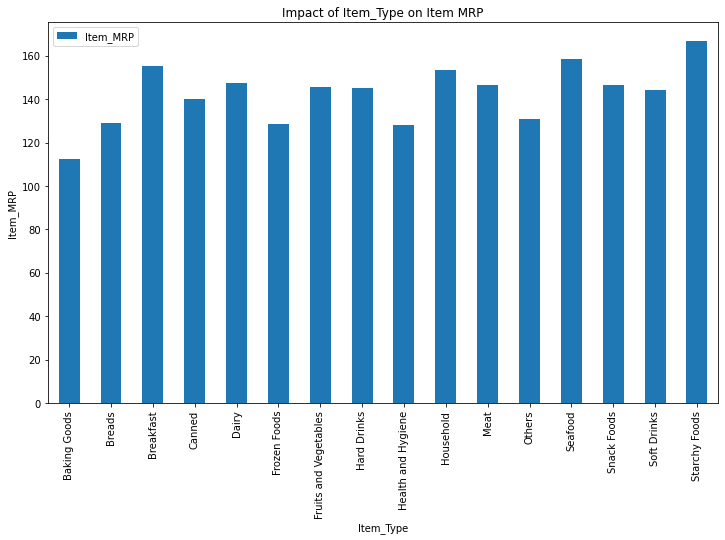

In [11]:
MRP_pivot = \
data.pivot_table(index='Item_Type', values="Item_MRP", aggfunc=np.median)
MRP_pivot.plot(kind='bar', figsize=(12,7))
plt.xlabel("Item_Type")
plt.ylabel("Item_MRP")
plt.title("Impact of Item_Type on Item MRP")
plt.xticks(rotation=90)
plt.show()

## Access:
- Biểu đồ cho thấy các mặt hàng bán lẻ của công ty.
- Giá bán lẻ tốt nhất của công ty là sản phẩm 'Starchy Foods'.
- Giá bán lẻ ít nhất của công ty là sản phẩm 'Baking Goods'.

$\rightarrow$ Qua đó, cho thấy các sản phẩm được ưa chuộng và bán lẻ nhiều nhất là các sản phẩm giàu tinh bột.

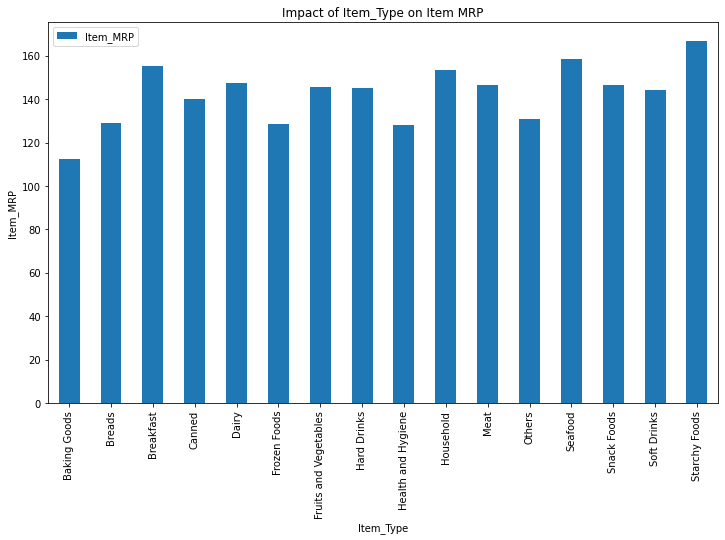

In [12]:
MRP_pivot = \
data.pivot_table(index='Item_Type', values="Item_MRP", aggfunc=np.median)
MRP_pivot.plot(kind='bar', figsize=(12,7))
plt.xlabel("Item_Type")
plt.ylabel("Item_MRP")
plt.title("Impact of Item_Type on Item MRP")
plt.xticks(rotation=90)
plt.show()

In [13]:
data['Outlet_Identifier']

0       OUT049
1       OUT018
2       OUT049
3       OUT010
4       OUT013
         ...  
8518    OUT013
8519    OUT045
8520    OUT035
8521    OUT018
8522    OUT046
Name: Outlet_Identifier, Length: 8523, dtype: object